![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## Which plants are preferred by native vs non-native bee species?

In [13]:
import pandas as pd
data = pd.read_csv("data/plants_and_bees.csv")
data

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [14]:
natives = data[data["nonnative_bee"] == 0].groupby("plant_species").size().sort_values(ascending=False)
non_natives = data[data["nonnative_bee"] == 1].groupby("plant_species").size().sort_values(ascending=False)

natives, non_natives

(plant_species
 None                        762
 Leucanthemum vulgare        102
 Rudbeckia hirta              51
 Daucus carota                31
 Cichorium intybus            25
 Chamaecrista fasciculata     23
 Trifolium pratense           21
 Helenium flexuosum           19
 Melilotus officinalis        16
 Penstemon digitalis          15
 Asclepias tuberosa           13
 Coronilla varia              12
 Rudbeckia triloba            12
 Monarda punctata             10
 Cosmos bipinnatus             9
 Trifolium repens              6
 Agastache foeniculum          5
 Lobularia maritima            5
 Pycnanthemum tenuifolium      4
 Tradescantia virginiana       3
 Lotus corniculatus            3
 Viola cornuta                 3
 Origanum vulgare              2
 Trifolium incarnatum          2
 dtype: int64,
 plant_species
 None                    33
 Daucus carota            1
 Trifolium incarnatum     1
 dtype: int64)

In [15]:
natives = natives.drop('None').head(3)
natives

plant_species
Leucanthemum vulgare    102
Rudbeckia hirta          51
Daucus carota            31
dtype: int64

The top 3 most preferred plant species by native bee species are Leucanthemum vulgare, Rudbeckia hirta, and Daucus carota.

<AxesSubplot: ylabel='plant_species'>

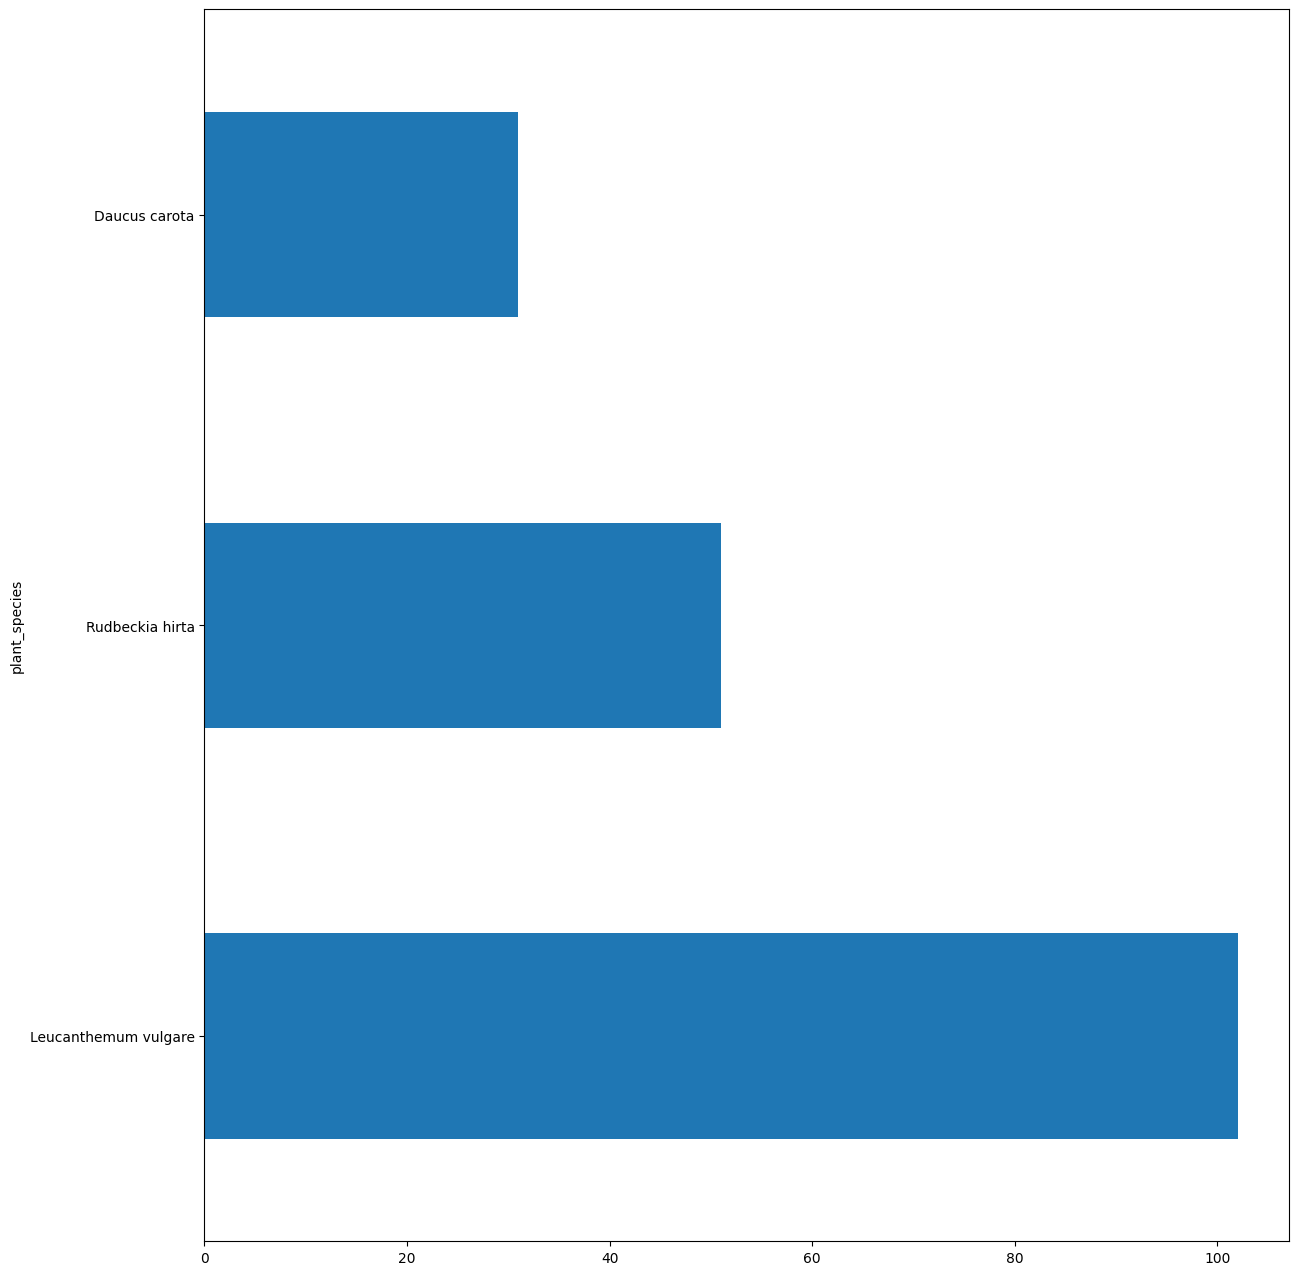

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 16))
natives.plot(kind='barh',y='plant_species')

In [25]:
non_natives = non_natives.drop('None').head(3)
non_natives

plant_species
Daucus carota           1
Trifolium incarnatum    1
dtype: int64

Only two data available for plant species that are preferred by non-native bee species, which are Daucus carota and Trifolium incarnatum. The rest of the plant species data are unrecorded.

<AxesSubplot: ylabel='plant_species'>

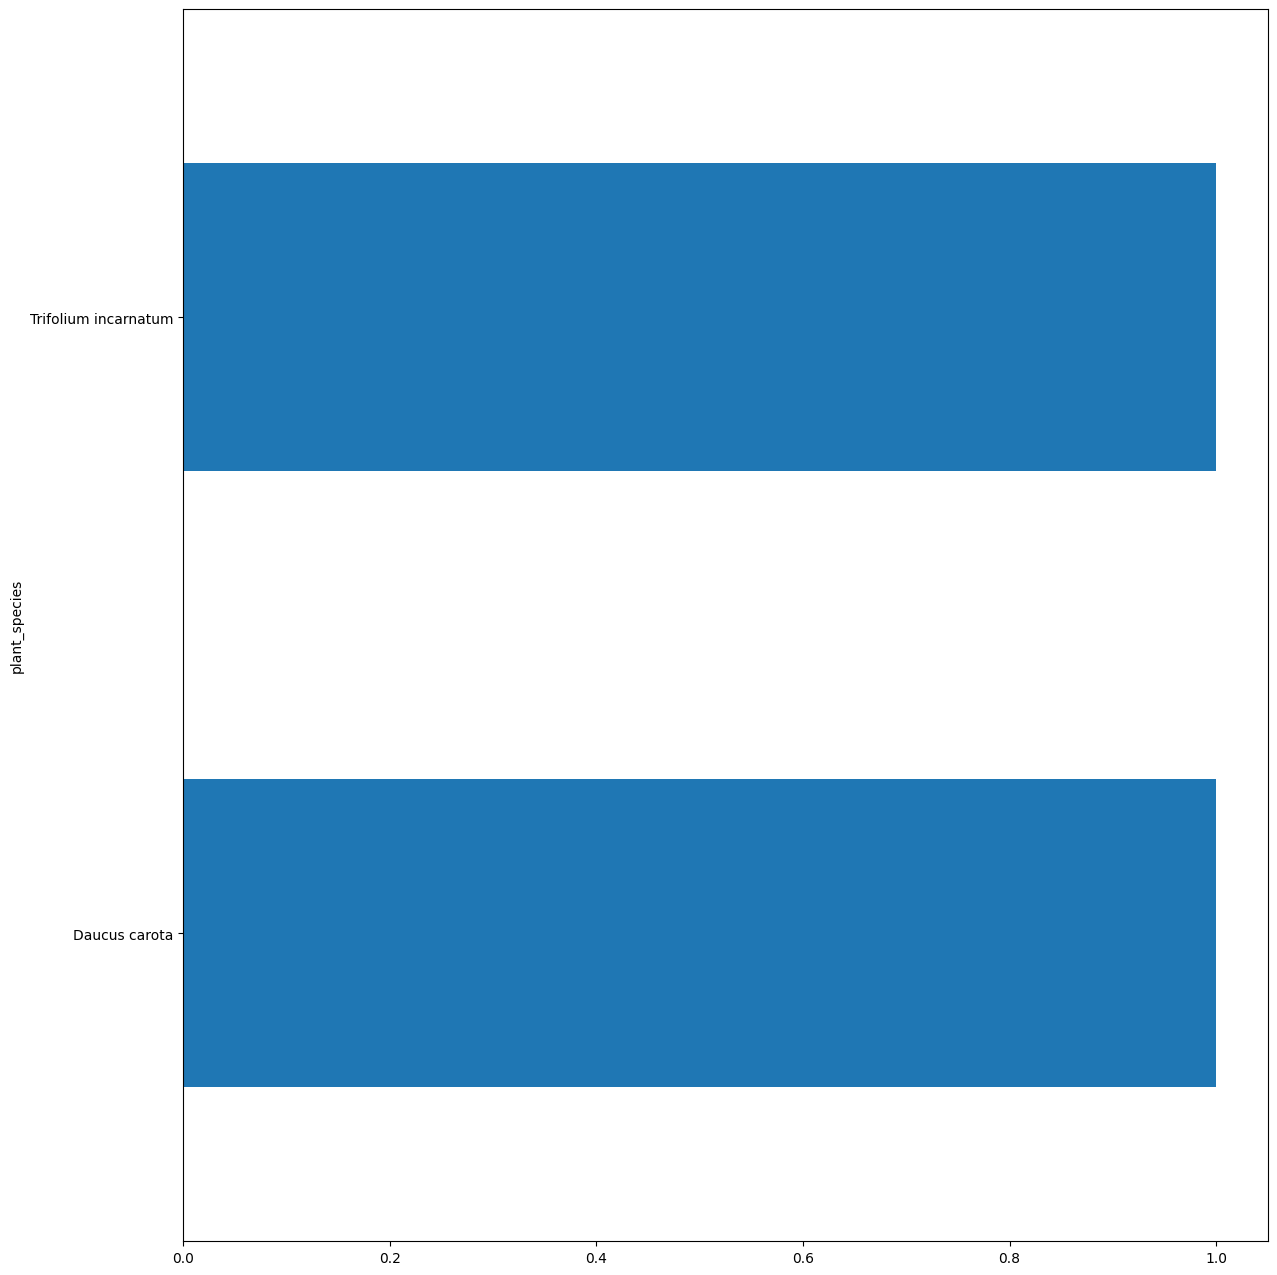

In [26]:
plt.figure(figsize=(14, 16))
non_natives.plot(kind='barh',y='plant_species')

## A visualization of the distribution of bee and plant species across one of the samples.

In [27]:
import random

random_sample_id = random.choice(data["sample_id"])
random_sample_id

17468

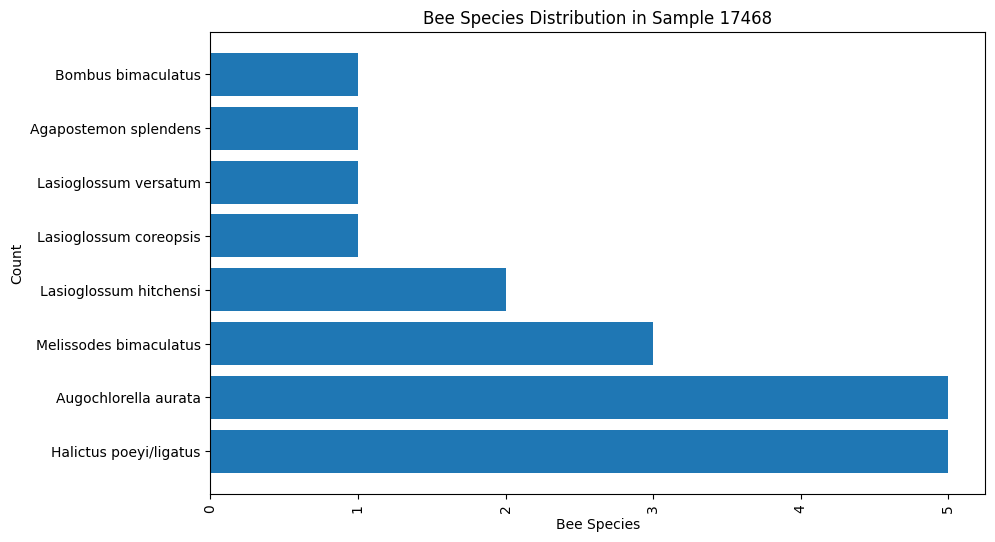

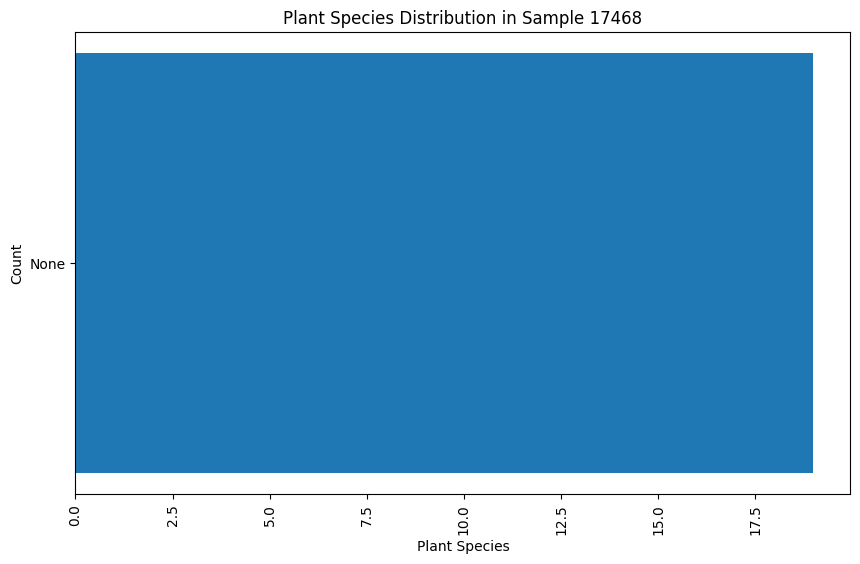

In [31]:
import matplotlib.pyplot as plt

# Select a sample
sample_id = random_sample_id

# Filter the data for the selected sample
sample_data = data[data['sample_id'] == sample_id]

# Count the number of occurrences of each bee species
bee_counts = sample_data['bee_species'].value_counts()

# Count the number of occurrences of each plant species
plant_counts = sample_data['plant_species'].value_counts()

# Create a bar plot for bee species
plt.figure(figsize=(10, 6))
plt.barh(bee_counts.index, bee_counts.values)
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.title(f'Bee Species Distribution in Sample {sample_id}')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot for plant species
plt.figure(figsize=(10, 6))
plt.barh(plant_counts.index, plant_counts.values)
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.title(f'Plant Species Distribution in Sample {sample_id}')
plt.xticks(rotation=90)
plt.show()

In this sample, there are several bee species recorded, with the top two species are Halictus poeyi/ligatus and Augochlorella aurata.

The plant species in this sample are unrecorded.

## Top three plant species recommended to support native bees.

In [5]:
# Calculate the total number of occurrences of each plant species for native bees
native_plant_counts = data[data["nonnative_bee"] == 0].groupby("plant_species").size().sort_values(ascending=False)

native_plant_counts = native_plant_counts.tail(native_plant_counts.shape[0]-1)

# Select the top three plant species
top_three_native_plants = native_plant_counts.head(3)

top_three_native_plants

plant_species
Leucanthemum vulgare    102
Rudbeckia hirta          51
Daucus carota            31
dtype: int64

The top 3 most preferred plant species by native bee species are Leucanthemum vulgare, Rudbeckia hirta, and Daucus carota. These plants would be best for supporting native bee species in order for them to thrive.